# Planar Data Classification with a Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
PlanarData1 = pd.read_csv('PlanarData1.csv', sep=',', index_col=0)
PlanarData1

,x1,x2,y
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0
...,...,...,...
395,0.450368,2.408121,1
396,0.037573,0.891601,1
397,0.213641,1.732016,1
398,0.324387,-2.116325,1


In [3]:
X = PlanarData1.loc[:,['x1','x2']].values
Y = PlanarData1.loc[:,['y']].values

In [4]:
mu = np.mean(X, axis=0)26
sigma = np.std(X, axis=0)

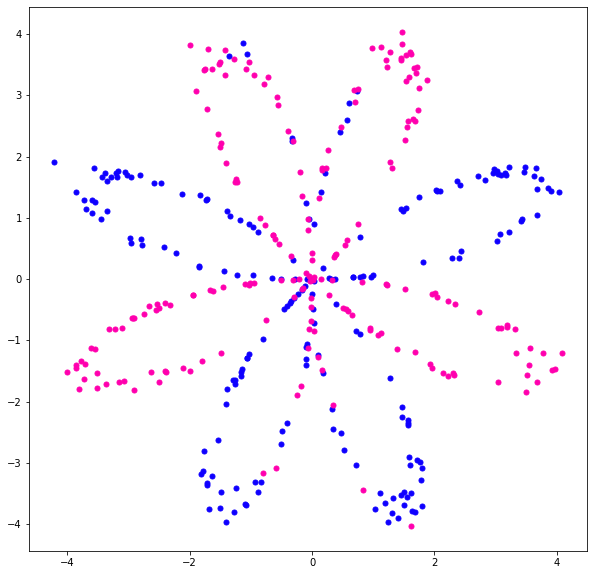

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
pos = np.where(Y[:,0] == 1)[0]
neg = np.where(Y[:,0] == 0)[0]
ax.plot(X[pos,0], X[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X[neg,0], X[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='') 

In [6]:
def Model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(function=lambda x: (x-mu)/sigma,
                               input_shape=[X.shape[1]]),
        tf.keras.layers.Dense(units=Y.shape[1],
                              activation='sigmoid',
                              kernel_initializer='random_normal',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    model.fit(X, Y, epochs=5000, batch_size=X.shape[0])
    return model

In [7]:
model = Model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 400 samples
Epoch 1/5000
400/400 [==============================] - 0s 490us/sample - loss: 0.6934 - binary_accuracy: 0.4875
Epoch 2/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6933 - binary_accuracy: 0.4875
Epoch 3/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6933 - binary_accuracy: 0.4900
Epoch 4/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6933 - binary_accuracy: 0.4900
Epoch 5/5000
400/400 [==============================] - 0

Epoch 69/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 70/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 71/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 72/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 73/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6926 - binary_accuracy: 0.5050
Epoch 74/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6926 - binary_accuracy: 0.5025
Epoch 75/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6926 - binary_accuracy: 0.5075
Epoch 76/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6926 - binary_accuracy: 0.5075
Epoch 77/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6926 - binary_accuracy:

Epoch 142/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6920 - binary_accuracy: 0.5675
Epoch 143/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6920 - binary_accuracy: 0.5675
Epoch 144/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6920 - binary_accuracy: 0.5700
Epoch 145/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6920 - binary_accuracy: 0.5700
Epoch 146/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6920 - binary_accuracy: 0.5700
Epoch 147/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6920 - binary_accuracy: 0.5725
Epoch 148/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6919 - binary_accuracy: 0.5750
Epoch 149/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6919 - binary_accuracy: 0.5775
Epoch 150/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6919 - binary_

Epoch 215/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6913 - binary_accuracy: 0.6625
Epoch 216/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6913 - binary_accuracy: 0.6625
Epoch 217/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6913 - binary_accuracy: 0.6625
Epoch 218/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6913 - binary_accuracy: 0.6650
Epoch 219/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6913 - binary_accuracy: 0.6650
Epoch 220/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6913 - binary_accuracy: 0.6650
Epoch 221/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6913 - binary_accuracy: 0.6650
Epoch 222/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6913 - binary_accuracy: 0.6650
Epoch 223/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6913 - binary_

Epoch 288/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6907 - binary_accuracy: 0.6625
Epoch 289/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6907 - binary_accuracy: 0.6625
Epoch 290/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6907 - binary_accuracy: 0.6625
Epoch 291/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6907 - binary_accuracy: 0.6625
Epoch 292/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6907 - binary_accuracy: 0.6625
Epoch 293/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6907 - binary_accuracy: 0.6625
Epoch 294/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6906 - binary_accuracy: 0.6650
Epoch 295/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6906 - binary_accuracy: 0.6650
Epoch 296/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6906 - binary_

Epoch 361/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6901 - binary_accuracy: 0.6650
Epoch 362/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6901 - binary_accuracy: 0.6650
Epoch 363/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6901 - binary_accuracy: 0.6625
Epoch 364/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6901 - binary_accuracy: 0.6625
Epoch 365/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6900 - binary_accuracy: 0.6625
Epoch 366/5000
400/400 [==============================] - 0s 10us/sample - loss: 0.6900 - binary_accuracy: 0.6625
Epoch 367/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6900 - binary_accuracy: 0.6625
Epoch 368/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6900 - binary_accuracy: 0.6625
Epoch 369/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6900 - binary

Epoch 434/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6895 - binary_accuracy: 0.6325
Epoch 435/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6895 - binary_accuracy: 0.6325
Epoch 436/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6895 - binary_accuracy: 0.6325
Epoch 437/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6895 - binary_accuracy: 0.6325
Epoch 438/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6895 - binary_accuracy: 0.6325
Epoch 439/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6894 - binary_accuracy: 0.6325
Epoch 440/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6894 - binary_accuracy: 0.6325
Epoch 441/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6894 - binary_accuracy: 0.6325
Epoch 442/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6894 - binary_

Epoch 507/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 508/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 509/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 510/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 511/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 512/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 513/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 514/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6889 - binary_accuracy: 0.6125
Epoch 515/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6889 - binary_

Epoch 580/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6884 - binary_accuracy: 0.5850
Epoch 581/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6884 - binary_accuracy: 0.5850
Epoch 582/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6883 - binary_accuracy: 0.5850
Epoch 583/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6883 - binary_accuracy: 0.5850
Epoch 584/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6883 - binary_accuracy: 0.5850
Epoch 585/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6883 - binary_accuracy: 0.5850
Epoch 586/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6883 - binary_accuracy: 0.5850
Epoch 587/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6883 - binary_accuracy: 0.5850
Epoch 588/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6883 - binary_

Epoch 653/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 654/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 655/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 656/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 657/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 658/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 659/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 660/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6878 - binary_accuracy: 0.5725
Epoch 661/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6878 - binary_

Epoch 726/5000
400/400 [==============================] - 0s 15us/sample - loss: 0.6873 - binary_accuracy: 0.5675
Epoch 727/5000
400/400 [==============================] - 0s 14us/sample - loss: 0.6873 - binary_accuracy: 0.5675
Epoch 728/5000
400/400 [==============================] - 0s 13us/sample - loss: 0.6873 - binary_accuracy: 0.5650
Epoch 729/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6873 - binary_accuracy: 0.5650
Epoch 730/5000
400/400 [==============================] - 0s 3us/sample - loss: 0.6873 - binary_accuracy: 0.5650
Epoch 731/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6873 - binary_accuracy: 0.5650
Epoch 732/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6873 - binary_accuracy: 0.5650
Epoch 733/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6873 - binary_accuracy: 0.5625
Epoch 734/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6873 - bina

Epoch 799/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 800/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 801/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 802/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 803/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 804/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 805/5000
400/400 [==============================] - 0s 13us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 806/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6868 - binary_accuracy: 0.5525
Epoch 807/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6868 - binary

Epoch 872/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 873/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 874/5000
400/400 [==============================] - 0s 13us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 875/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 876/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 877/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 878/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 879/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6863 - binary_accuracy: 0.5500
Epoch 880/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6863 - binary

Epoch 945/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6859 - binary_accuracy: 0.5400
Epoch 946/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6859 - binary_accuracy: 0.5400
Epoch 947/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6859 - binary_accuracy: 0.5400
Epoch 948/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6859 - binary_accuracy: 0.5400
Epoch 949/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6859 - binary_accuracy: 0.5400
Epoch 950/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6859 - binary_accuracy: 0.5400
Epoch 951/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6858 - binary_accuracy: 0.5400
Epoch 952/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6858 - binary_accuracy: 0.5400
Epoch 953/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6858 - binary_

Epoch 1018/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1019/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1020/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1021/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1022/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1023/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1024/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1025/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6854 - binary_accuracy: 0.5400
Epoch 1026/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6854 

Epoch 1090/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1091/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1092/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1093/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1094/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1095/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1096/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1097/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6850 - binary_accuracy: 0.5400
Epoch 1098/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6850 

Epoch 1162/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1163/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1164/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1165/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1166/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1167/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1168/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1169/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6846 - binary_accuracy: 0.5375
Epoch 1170/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6846 

Epoch 1234/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1235/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1236/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1237/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1238/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1239/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1240/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1241/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6842 - binary_accuracy: 0.5350
Epoch 1242/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6842 

Epoch 1306/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6838 - binary_accuracy: 0.5325
Epoch 1307/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6838 - binary_accuracy: 0.5300
Epoch 1308/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6838 - binary_accuracy: 0.5300
Epoch 1309/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6838 - binary_accuracy: 0.5300
Epoch 1310/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6838 - binary_accuracy: 0.5275
Epoch 1311/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6838 - binary_accuracy: 0.5275
Epoch 1312/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6838 - binary_accuracy: 0.5275
Epoch 1313/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6838 - binary_accuracy: 0.5275
Epoch 1314/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6838 

Epoch 1378/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6835 - binary_accuracy: 0.5275
Epoch 1379/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6835 - binary_accuracy: 0.5275
Epoch 1380/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6835 - binary_accuracy: 0.5275
Epoch 1381/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6835 - binary_accuracy: 0.5275
Epoch 1382/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6834 - binary_accuracy: 0.5275
Epoch 1383/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6834 - binary_accuracy: 0.5275
Epoch 1384/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6834 - binary_accuracy: 0.5275
Epoch 1385/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6834 - binary_accuracy: 0.5275
Epoch 1386/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6834 

Epoch 1450/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1451/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1452/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1453/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1454/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1455/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1456/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1457/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6831 - binary_accuracy: 0.5225
Epoch 1458/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6831 

Epoch 1522/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6828 - binary_accuracy: 0.5175
Epoch 1523/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6828 - binary_accuracy: 0.5175
Epoch 1524/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6828 - binary_accuracy: 0.5175
Epoch 1525/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6828 - binary_accuracy: 0.5175
Epoch 1526/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6828 - binary_accuracy: 0.5175
Epoch 1527/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6827 - binary_accuracy: 0.5175
Epoch 1528/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6827 - binary_accuracy: 0.5175
Epoch 1529/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6827 - binary_accuracy: 0.5175
Epoch 1530/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6827 

Epoch 1594/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1595/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1596/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1597/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1598/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1599/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1600/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1601/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6824 - binary_accuracy: 0.5150
Epoch 1602/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6824 

Epoch 1666/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1667/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1668/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1669/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1670/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1671/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1672/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1673/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6821 - binary_accuracy: 0.5125
Epoch 1674/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6821 

Epoch 1738/5000
400/400 [==============================] - 0s 17us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1739/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1740/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1741/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1742/5000
400/400 [==============================] - 0s 19us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1743/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1744/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1745/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6818 - binary_accuracy: 0.5125
Epoch 1746/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.681

Epoch 1810/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1811/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1812/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1813/5000
400/400 [==============================] - 0s 10us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1814/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1815/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1816/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1817/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6815 - binary_accuracy: 0.5100
Epoch 1818/5000
400/400 [==============================] - 0s 10us/sample - loss: 0.681

Epoch 1882/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1883/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1884/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1885/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1886/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1887/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1888/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1889/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6812 - binary_accuracy: 0.5025
Epoch 1890/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6812 

Epoch 1954/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6810 - binary_accuracy: 0.5025
Epoch 1955/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6810 - binary_accuracy: 0.5025
Epoch 1956/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6810 - binary_accuracy: 0.5025
Epoch 1957/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6809 - binary_accuracy: 0.5025
Epoch 1958/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6809 - binary_accuracy: 0.5025
Epoch 1959/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6809 - binary_accuracy: 0.5025
Epoch 1960/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6809 - binary_accuracy: 0.5025
Epoch 1961/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6809 - binary_accuracy: 0.5025
Epoch 1962/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6809 

Epoch 2026/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2027/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2028/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2029/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2030/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2031/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2032/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2033/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6807 - binary_accuracy: 0.5025
Epoch 2034/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6807 

Epoch 2098/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2099/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2100/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2101/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2102/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2103/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2104/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2105/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6804 - binary_accuracy: 0.5025
Epoch 2106/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6804 

Epoch 2170/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2171/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2172/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2173/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2174/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2175/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2176/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2177/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6802 - binary_accuracy: 0.5025
Epoch 2178/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6802 

Epoch 2242/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6800 - binary_accuracy: 0.4975
Epoch 2243/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2244/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2245/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2246/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2247/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2248/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2249/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6799 - binary_accuracy: 0.4975
Epoch 2250/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6799 

Epoch 2314/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2315/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2316/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2317/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2318/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2319/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2320/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2321/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6797 - binary_accuracy: 0.4950
Epoch 2322/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6797 

Epoch 2386/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2387/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2388/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2389/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2390/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2391/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2392/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2393/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6795 - binary_accuracy: 0.4925
Epoch 2394/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6795 

Epoch 2458/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2459/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2460/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2461/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2462/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2463/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2464/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2465/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6793 - binary_accuracy: 0.4925
Epoch 2466/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6793 

Epoch 2530/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2531/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2532/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2533/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2534/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2535/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2536/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2537/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6791 - binary_accuracy: 0.4925
Epoch 2538/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6791 

Epoch 2602/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2603/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2604/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2605/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2606/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2607/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2608/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2609/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6789 - binary_accuracy: 0.4925
Epoch 2610/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6789 

Epoch 2674/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2675/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2676/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2677/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2678/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2679/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2680/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2681/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6787 - binary_accuracy: 0.4925
Epoch 2682/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6787 

Epoch 2746/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2747/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2748/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2749/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2750/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2751/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2752/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2753/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6785 - binary_accuracy: 0.4900
Epoch 2754/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6785 

Epoch 2818/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2819/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2820/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2821/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2822/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2823/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2824/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2825/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6783 - binary_accuracy: 0.4900
Epoch 2826/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6783 

Epoch 2890/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2891/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2892/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2893/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2894/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2895/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2896/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2897/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6781 - binary_accuracy: 0.4900
Epoch 2898/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6781 

Epoch 2962/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2963/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2964/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2965/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2966/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2967/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2968/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2969/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6780 - binary_accuracy: 0.4875
Epoch 2970/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6780 

Epoch 3034/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3035/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3036/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3037/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3038/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3039/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3040/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3041/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6778 - binary_accuracy: 0.4875
Epoch 3042/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6778 

Epoch 3106/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3107/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3108/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3109/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3110/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3111/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3112/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3113/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6776 - binary_accuracy: 0.4850
Epoch 3114/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6776 

Epoch 3178/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3179/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3180/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3181/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3182/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3183/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3184/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3185/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6775 - binary_accuracy: 0.4850
Epoch 3186/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6775 

Epoch 3250/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6774 - binary_accuracy: 0.4825
Epoch 3251/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3252/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3253/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3254/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3255/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3256/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3257/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6773 - binary_accuracy: 0.4825
Epoch 3258/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6773 

Epoch 3322/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3323/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3324/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3325/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3326/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3327/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3328/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3329/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6772 - binary_accuracy: 0.4825
Epoch 3330/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6772 

Epoch 3394/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3395/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3396/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3397/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3398/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3399/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3400/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3401/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6771 - binary_accuracy: 0.4800
Epoch 3402/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6771 

Epoch 3466/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3467/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3468/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3469/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3470/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3471/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3472/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3473/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6769 - binary_accuracy: 0.4800
Epoch 3474/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6769 

Epoch 3538/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3539/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3540/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3541/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3542/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3543/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3544/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3545/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6768 - binary_accuracy: 0.4800
Epoch 3546/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6768 

Epoch 3610/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3611/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3612/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3613/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3614/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3615/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3616/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3617/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6767 - binary_accuracy: 0.4800
Epoch 3618/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6767 

Epoch 3682/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3683/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3684/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3685/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3686/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3687/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3688/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3689/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6766 - binary_accuracy: 0.4800
Epoch 3690/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6766 

Epoch 3754/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6765 - binary_accuracy: 0.4800
Epoch 3755/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6765 - binary_accuracy: 0.4800
Epoch 3756/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6765 - binary_accuracy: 0.4800
Epoch 3757/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6765 - binary_accuracy: 0.4800
Epoch 3758/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6765 - binary_accuracy: 0.4800
Epoch 3759/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6764 - binary_accuracy: 0.4800
Epoch 3760/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6764 - binary_accuracy: 0.4800
Epoch 3761/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6764 - binary_accuracy: 0.4800
Epoch 3762/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6764 

Epoch 3826/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3827/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3828/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3829/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3830/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3831/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3832/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3833/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6763 - binary_accuracy: 0.4775
Epoch 3834/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6763 

Epoch 3898/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3899/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3900/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3901/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3902/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3903/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3904/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3905/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6762 - binary_accuracy: 0.4775
Epoch 3906/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6762 

Epoch 3970/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3971/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3972/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3973/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3974/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3975/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3976/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3977/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6761 - binary_accuracy: 0.4775
Epoch 3978/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6761 

Epoch 4042/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4043/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4044/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4045/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4046/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4047/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4048/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4049/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6760 - binary_accuracy: 0.4775
Epoch 4050/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6760 

Epoch 4114/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4115/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4116/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4117/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4118/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4119/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4120/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4121/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6759 - binary_accuracy: 0.4775
Epoch 4122/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6759 

Epoch 4186/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4187/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4188/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4189/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4190/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4191/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4192/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4193/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4194/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6758 

Epoch 4258/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4259/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4260/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4261/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4262/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4263/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6758 - binary_accuracy: 0.4775
Epoch 4264/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4265/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4266/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6757 

Epoch 4330/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4331/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4332/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4333/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4334/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4335/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4336/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4337/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6757 - binary_accuracy: 0.4775
Epoch 4338/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6757 

Epoch 4402/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4403/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4404/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4405/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4406/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4407/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4408/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4409/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6756 - binary_accuracy: 0.4775
Epoch 4410/5000
400/400 [==============================] - 0s 12us/sample - loss: 0.6756

Epoch 4474/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4475/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4476/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4477/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4478/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4479/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4480/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4481/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6755 - binary_accuracy: 0.4775
Epoch 4482/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6755 

Epoch 4546/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4547/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4548/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4549/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4550/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4551/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4552/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4553/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6754 - binary_accuracy: 0.4750
Epoch 4554/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6754 

Epoch 4618/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4619/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4620/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4621/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4622/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4623/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4624/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4625/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4626/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 

Epoch 4690/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4691/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4692/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4693/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4694/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4695/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4696/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4697/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 - binary_accuracy: 0.4750
Epoch 4698/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6753 

Epoch 4762/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4763/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4764/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4765/5000
400/400 [==============================] - 0s 9us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4766/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4767/5000
400/400 [==============================] - 0s 10us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4768/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4769/5000
400/400 [==============================] - 0s 17us/sample - loss: 0.6752 - binary_accuracy: 0.4750
Epoch 4770/5000
400/400 [==============================] - 0s 10us/sample - loss: 0.67

Epoch 4834/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4835/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4836/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4837/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4838/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4839/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4840/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4841/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4842/5000
400/400 [==============================] - 0s 4us/sample - loss: 0.6751 

Epoch 4906/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4907/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4908/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4909/5000
400/400 [==============================] - 0s 12us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4910/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4911/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4912/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4913/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6751 - binary_accuracy: 0.4750
Epoch 4914/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6751

Epoch 4978/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4979/5000
400/400 [==============================] - 0s 8us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4980/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4981/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4982/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4983/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4984/5000
400/400 [==============================] - 0s 7us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4985/5000
400/400 [==============================] - 0s 5us/sample - loss: 0.6750 - binary_accuracy: 0.4750
Epoch 4986/5000
400/400 [==============================] - 0s 6us/sample - loss: 0.6750 

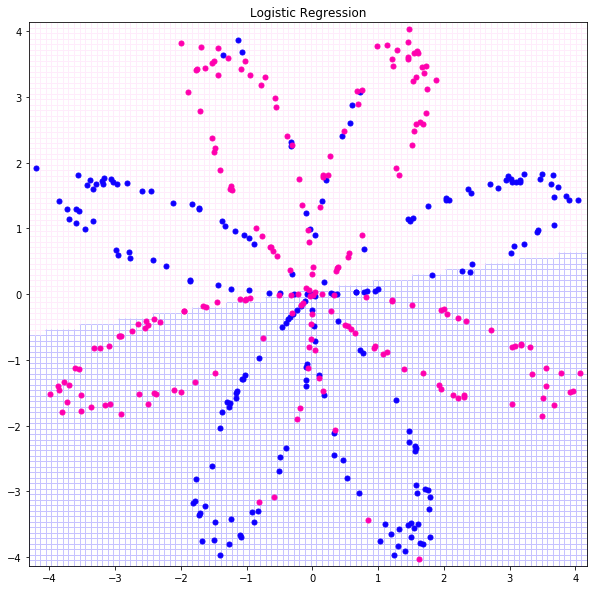

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X[:,0])-0.1, np.max(X[:,0])+0.1, np.min(X[:,1])-0.1, np.max(X[:,1])+0.1])
ax.set_title('Logistic Regression')

u = np.linspace(np.min(X[:,0])-0.1, np.max(X[:,0])+0.1, 100)
v = np.linspace(np.min(X[:,1])-0.1, np.max(X[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y[:,0] == 1)[0]
neg = np.where(Y[:,0] == 0)[0]
ax.plot(X[pos,0], X[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X[neg,0], X[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

In [9]:
def Model_():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(function=lambda x: (x-mu)/sigma,
                               input_shape=[X.shape[1]]),
        tf.keras.layers.Dense(units=4, 
                              activation='tanh', 
                              kernel_initializer='random_normal', 
                              bias_initializer='zeros'),
        tf.keras.layers.Dense(units=Y.shape[1],
                              activation='sigmoid',
                              kernel_initializer='random_normal',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=1.2)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.fit(X, Y, epochs=10000, batch_size=X.shape[0], callbacks=[callback1, callback2])
    return model

In [10]:
model_ = Model_()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Train on 400 samples
Epoch 1/10000
400/400 [==============================] - 0s 479us/sample - loss: 0.6929 - binary_accuracy: 0.4975
Epoch 2/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.6927 - binary_accuracy: 0.5100
Epoch 3/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.6924 - binary_accuracy: 0.5500
Epoch 4/10000
400/400 [======

Epoch 67/10000
400/400 [==============================] - 0s 9us/sample - loss: 0.6532 - binary_accuracy: 0.5450
Epoch 68/10000
400/400 [==============================] - 0s 9us/sample - loss: 0.6521 - binary_accuracy: 0.5425
Epoch 69/10000
400/400 [==============================] - 0s 12us/sample - loss: 0.6509 - binary_accuracy: 0.5475
Epoch 70/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.6497 - binary_accuracy: 0.5475
Epoch 71/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.6485 - binary_accuracy: 0.5500
Epoch 72/10000
400/400 [==============================] - 0s 12us/sample - loss: 0.6473 - binary_accuracy: 0.5500
Epoch 73/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.6462 - binary_accuracy: 0.5525
Epoch 74/10000
400/400 [==============================] - 0s 10us/sample - loss: 0.6450 - binary_accuracy: 0.5550
Epoch 75/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.6438 - bina

400/400 [==============================] - 0s 5us/sample - loss: 0.4616 - binary_accuracy: 0.8400
Epoch 140/10000
400/400 [==============================] - 0s 7us/sample - loss: 0.4582 - binary_accuracy: 0.8400
Epoch 141/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.4549 - binary_accuracy: 0.8400
Epoch 142/10000
400/400 [==============================] - 0s 9us/sample - loss: 0.4518 - binary_accuracy: 0.8400
Epoch 143/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.4488 - binary_accuracy: 0.8400
Epoch 144/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.4459 - binary_accuracy: 0.8425
Epoch 145/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.4430 - binary_accuracy: 0.8425
Epoch 146/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.4403 - binary_accuracy: 0.8425
Epoch 147/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.4377 - binary_accurac

Epoch 211/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3652 - binary_accuracy: 0.8550
Epoch 212/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3647 - binary_accuracy: 0.8550
Epoch 213/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3642 - binary_accuracy: 0.8575
Epoch 214/10000
400/400 [==============================] - 0s 9us/sample - loss: 0.3638 - binary_accuracy: 0.8600
Epoch 215/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3633 - binary_accuracy: 0.8600
Epoch 216/10000
400/400 [==============================] - 0s 7us/sample - loss: 0.3629 - binary_accuracy: 0.8600
Epoch 217/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.3624 - binary_accuracy: 0.8600
Epoch 218/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3620 - binary_accuracy: 0.8600
Epoch 219/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3616 

Epoch 283/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3436 - binary_accuracy: 0.8675
Epoch 284/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3434 - binary_accuracy: 0.8675
Epoch 285/10000
400/400 [==============================] - 0s 7us/sample - loss: 0.3432 - binary_accuracy: 0.8675
Epoch 286/10000
400/400 [==============================] - 0s 7us/sample - loss: 0.3430 - binary_accuracy: 0.8675
Epoch 287/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3429 - binary_accuracy: 0.8700
Epoch 288/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3427 - binary_accuracy: 0.8700
Epoch 289/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.3425 - binary_accuracy: 0.8700
Epoch 290/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3423 - binary_accuracy: 0.8700
Epoch 291/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3421 

Epoch 355/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3331 - binary_accuracy: 0.8700
Epoch 356/10000
400/400 [==============================] - 0s 9us/sample - loss: 0.3330 - binary_accuracy: 0.8700
Epoch 357/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3329 - binary_accuracy: 0.8700
Epoch 358/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3327 - binary_accuracy: 0.8700
Epoch 359/10000
400/400 [==============================] - 0s 7us/sample - loss: 0.3326 - binary_accuracy: 0.8700
Epoch 360/10000
400/400 [==============================] - 0s 8us/sample - loss: 0.3325 - binary_accuracy: 0.8700
Epoch 361/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3324 - binary_accuracy: 0.8700
Epoch 362/10000
400/400 [==============================] - 0s 5us/sample - loss: 0.3323 - binary_accuracy: 0.8700
Epoch 363/10000
400/400 [==============================] - 0s 6us/sample - loss: 0.3322 

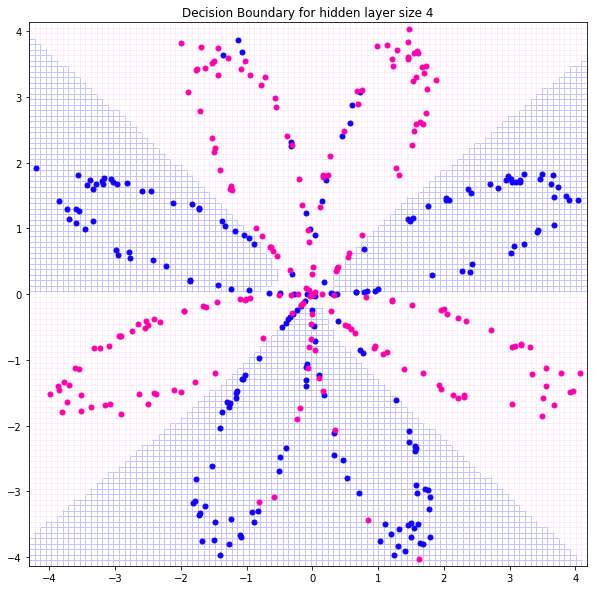

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X[:,0])-0.1, np.max(X[:,0])+0.1, np.min(X[:,1])-0.1, np.max(X[:,1])+0.1])
ax.set_title('Decision Boundary for hidden layer size 4') 

u = np.linspace(np.min(X[:,0])-0.1, np.max(X[:,0])+0.1, 100)
v = np.linspace(np.min(X[:,1])-0.1, np.max(X[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model_.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y[:,0] == 1)[0]
neg = np.where(Y[:,0] == 0)[0]
ax.plot(X[pos,0], X[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X[neg,0], X[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')